In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [7]:
from png_helper import load_data

In [8]:
def preprocessing(x):
    return np.concatenate((x, np.ones(x.shape[:-1])[..., np.newaxis]), axis=3)

In [9]:
(x_train, y_train), x_test = load_data()
x_train = x_train / 255.0
y_train = y_train / 255.0
x_test = x_test / 255.0
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)

In [10]:
x_train.shape, x_test.shape

((100, 400, 400, 4), (50, 608, 608, 4))

In [11]:
from showim import showim

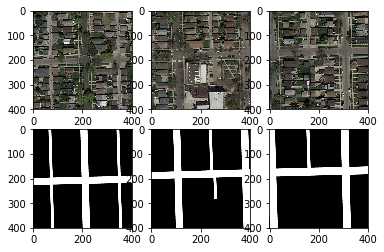

In [12]:
showim(x_train[0], x_train[1], x_train[2], y_train[0], y_train[1], y_train[2])

In [103]:
x_train[0][10][200:221]

array([[0.19215686, 0.25490196, 0.15686275, 1.        ],
       [0.19215686, 0.25098039, 0.15686275, 1.        ],
       [0.14901961, 0.22745098, 0.1254902 , 1.        ],
       [0.14117647, 0.23921569, 0.12156863, 1.        ],
       [0.12941176, 0.21568627, 0.10196078, 1.        ],
       [0.16078431, 0.19215686, 0.11764706, 1.        ],
       [0.29019608, 0.28235294, 0.22745098, 1.        ],
       [0.34509804, 0.3254902 , 0.27843137, 1.        ],
       [0.32156863, 0.29019608, 0.25098039, 1.        ],
       [0.34901961, 0.30980392, 0.27843137, 1.        ],
       [0.32156863, 0.28235294, 0.25098039, 1.        ],
       [0.40784314, 0.38039216, 0.34117647, 1.        ],
       [0.43137255, 0.41176471, 0.36862745, 1.        ],
       [0.36470588, 0.33333333, 0.30196078, 1.        ],
       [0.43137255, 0.40784314, 0.37254902, 1.        ],
       [0.40392157, 0.37647059, 0.34509804, 1.        ],
       [0.43921569, 0.41176471, 0.37254902, 1.        ],
       [0.43529412, 0.40784314,

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, (5, 5),
                         padding='same',
                         activation=tf.nn.relu,
                         input_shape=(400,400,4)),
  tf.keras.layers.Conv2D(1, (5, 5),
                         padding='same',
                         activation=tf.nn.relu)
])


In [33]:
# Compile model
model.compile(optimizer='adam',
              loss='squared_hinge',
              metrics=['accuracy'])

# Train
model.fit(x_train, y_train[..., np.newaxis], epochs=5)

# Evaluate on test
model.evaluate(x_train, y_train[..., np.newaxis])

Epoch 1/5
100/100 [==============================] - 3s 29ms/step - loss: 24.4774 - acc: 1.1819e-04
Epoch 2/5
100/100 [==============================] - 3s 26ms/step - loss: 24.3899 - acc: 3.6250e-06
Epoch 3/5
100/100 [==============================] - 3s 26ms/step - loss: 24.3921 - acc: 6.2500e-08
Epoch 4/5
100/100 [==============================] - 3s 26ms/step - loss: 24.4816 - acc: 0.0000e+00
Epoch 5/5
100/100 [==============================] - 1s 11ms/step


[24.393332014083864, 0.0]